In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle
from utils import get_MINST_data, get_mnist

In [2]:
ls

Autoencoder_tf.py           data/
DNN_tf.py                   pretrainingAE_and_AE.ipynb
__pycache__/                utils.py
autoencoder_tf2.py


In [3]:
from Autoencoder_tf import Autoencoder
from DNN_tf import DNN
from autoencoder_tf2 import Autoencoder2

In [4]:
def test_pretraining_dnn():
    Xtrain, Ytrain, Xtest, Ytest = get_MINST_data()
    # dnn = DNN([1000, 750, 500])
    # dnn.fit(Xtrain, Ytrain, Xtest, Ytest, epochs=3)
    # vs
    Xtrain = Xtrain.astype(np.float32)
    Xtest = Xtest.astype(np.float32)
    _, D = Xtrain.shape
    K = len(set(Ytrain))
    dnn = DNN(D, [1000, 750, 500], K)
    init_op = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init_op)
        dnn.set_session(session)
        dnn.fit(Xtrain, Ytrain, Xtest, Ytest, pretrain=True, epochs=10)

In [5]:
def test_single_autoencoder():
    Xtrain, Ytrain, Xtest, Ytest = get_MINST_data()
    Xtrain = Xtrain.astype(np.float32)
    Xtest = Xtest.astype(np.float32)

    _, D = Xtrain.shape
    autoencoder = Autoencoder(D, 300,0)
    init_op = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init_op)
        autoencoder.init_session(session)
        autoencoder.fit(Xtrain, show_fig=True)

        done = False
        while not done:
            i = np.random.choice(len(Xtest))
            x = Xtest[i]
            y = autoencoder.predict([x])
            plt.subplot(1,2,1)
            plt.imshow(x.reshape(28,28), cmap='gray')
            plt.title('Original')

            plt.subplot(1,2,2)
            plt.imshow(y.reshape(28,28), cmap='gray')
            plt.title('Reconstructed')

            plt.show()

            ans = input("Generate another?")
            if ans and ans[0] in ('n' or 'N'):
                done = True

epoch: 0
num of batches: 0 cost: 8.89383
num of batches: 10 cost: 8.86191
num of batches: 20 cost: 8.88071
num of batches: 30 cost: 8.79021
num of batches: 40 cost: 8.78443
num of batches: 50 cost: 8.78874
num of batches: 60 cost: 8.74013
num of batches: 70 cost: 8.75918
num of batches: 80 cost: 8.6657
num of batches: 90 cost: 8.66757
num of batches: 100 cost: 8.71948
num of batches: 110 cost: 8.7199
num of batches: 120 cost: 8.61765
num of batches: 130 cost: 8.7049
num of batches: 140 cost: 8.60174
num of batches: 150 cost: 8.60209
num of batches: 160 cost: 8.53346
num of batches: 170 cost: 8.58188
num of batches: 180 cost: 8.5664
num of batches: 190 cost: 8.54176
num of batches: 200 cost: 8.44839
num of batches: 210 cost: 8.455
num of batches: 220 cost: 8.45143
num of batches: 230 cost: 8.48164
num of batches: 240 cost: 8.46617
num of batches: 250 cost: 8.41939
num of batches: 260 cost: 8.38932
num of batches: 270 cost: 8.40279
num of batches: 280 cost: 8.37996
num of batches: 290 co

num of batches: 30 cost: 0.4095 error: 0.133
num of batches: 40 cost: 0.423351 error: 0.133
num of batches: 50 cost: 0.401945 error: 0.119
num of batches: 60 cost: 0.505562 error: 0.146
num of batches: 70 cost: 0.389858 error: 0.119
num of batches: 80 cost: 0.429006 error: 0.132
num of batches: 90 cost: 0.409033 error: 0.121
num of batches: 100 cost: 0.41079 error: 0.123
num of batches: 110 cost: 0.443638 error: 0.135
num of batches: 120 cost: 0.473019 error: 0.144
num of batches: 130 cost: 0.438453 error: 0.119
num of batches: 140 cost: 0.450704 error: 0.138
num of batches: 150 cost: 0.447446 error: 0.12
num of batches: 160 cost: 0.531809 error: 0.158
num of batches: 170 cost: 0.406866 error: 0.121
num of batches: 180 cost: 0.41381 error: 0.11
num of batches: 190 cost: 0.47125 error: 0.13
num of batches: 200 cost: 0.43874 error: 0.141
num of batches: 210 cost: 0.359275 error: 0.109
num of batches: 220 cost: 0.36456 error: 0.108
num of batches: 230 cost: 0.357911 error: 0.102
num of ba

num of batches: 110 cost: 0.449451 error: 0.115
num of batches: 120 cost: 0.426204 error: 0.125
num of batches: 130 cost: 0.367347 error: 0.092
num of batches: 140 cost: 0.353876 error: 0.096
num of batches: 150 cost: 0.32456 error: 0.09
num of batches: 160 cost: 0.314852 error: 0.09
num of batches: 170 cost: 0.386981 error: 0.099
num of batches: 180 cost: 0.341216 error: 0.085
num of batches: 190 cost: 0.360225 error: 0.103
num of batches: 200 cost: 0.563514 error: 0.15
num of batches: 210 cost: 0.511021 error: 0.147
num of batches: 220 cost: 0.334148 error: 0.089
num of batches: 230 cost: 0.354144 error: 0.096
num of batches: 240 cost: 0.372311 error: 0.085
num of batches: 250 cost: 0.332456 error: 0.088
num of batches: 260 cost: 0.351832 error: 0.096
num of batches: 270 cost: 0.297124 error: 0.075
num of batches: 280 cost: 0.361877 error: 0.106
num of batches: 290 cost: 0.291662 error: 0.069
num of batches: 300 cost: 0.311817 error: 0.087
num of batches: 310 cost: 0.320025 error: 0.

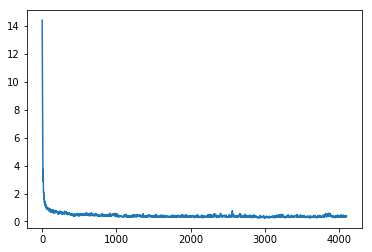

In [6]:
test_pretraining_dnn()

epoch: 0
num of batches: 0 cost: 4.14126
num of batches: 10 cost: 4.1398
num of batches: 20 cost: 4.10609
num of batches: 30 cost: 4.13276
num of batches: 40 cost: 4.12572
num of batches: 50 cost: 4.12847
num of batches: 60 cost: 4.13163
num of batches: 70 cost: 4.12554
num of batches: 80 cost: 4.13633
num of batches: 90 cost: 4.10816
num of batches: 100 cost: 4.08346
num of batches: 110 cost: 4.09946
num of batches: 120 cost: 4.0993
num of batches: 130 cost: 4.09037
num of batches: 140 cost: 4.04928
num of batches: 150 cost: 4.08317
num of batches: 160 cost: 4.06592
num of batches: 170 cost: 4.04821
num of batches: 180 cost: 4.08238
num of batches: 190 cost: 4.05196
num of batches: 200 cost: 4.0609
num of batches: 210 cost: 4.02043
num of batches: 220 cost: 4.05309
num of batches: 230 cost: 4.06139
num of batches: 240 cost: 4.03746
num of batches: 250 cost: 4.0185
num of batches: 260 cost: 4.04122
num of batches: 270 cost: 3.97913
num of batches: 280 cost: 4.03217
num of batches: 290 

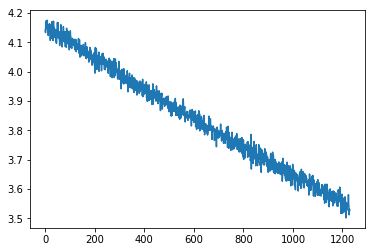

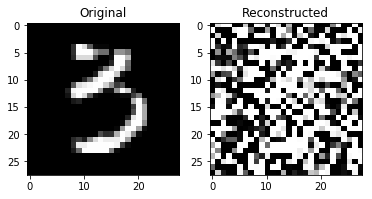

Generate another?N


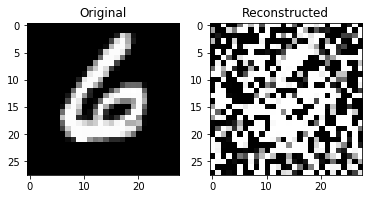

Generate another?N


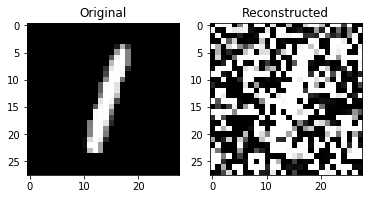

Generate another?N


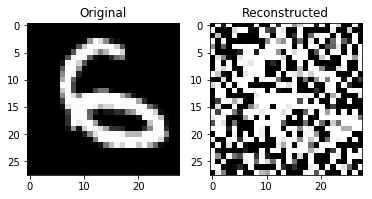

Generate another?N


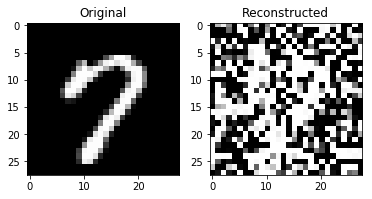

Generate another?N


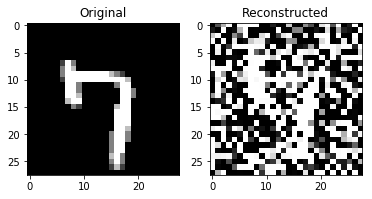

Generate another?N


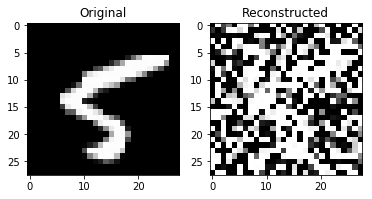

Generate another?n


In [8]:
test_single_autoencoder()

In [ ]:
# This is the comparision of the pre-training autoencodr and the autoencoder 